# Homework

# Scoring
- (1) = 50 points
    - (a): 8 points
    - (b): 20 points
    - (c): 10 points
    - (d): 12 points

# (1) Consider this paper:
Machine Learning Directed Search for Ultraincompressible, Superhard Materials \
Aria Mansouri Tehrani, Anton O. Oliynyk, Marcus Parry, Zeshan Rizvi, Samantha Couper, Feng Lin, Lowell Miyagi, Taylor D. Sparks, and Jakoah Brgoch* 

J. Am. Chem. Soc. 2018, 140, 31, 9844–9853

## (a) Understanding what they did
**Guidelines**:
- Answer each of the following in 1-3 sentences
- Use markdown cells for your answers
### (1) What was the objective of this paper?
### (2) Was this supervised or unsupervised learning?
### (3) Was this regression or classification?
### (4) Describe their approach to validating their machine learning model.

**Scoring**:
- +1 point for attempting each
- +1 point for suitable answer to each

### SOLUTION

- (1): discover new inorganic materials with high hardness
- (2): supervised (they have labeled data)
- (3): regression (the quantities they predict are continuous)
- (4): they used 20-fold CV for feature selection, then 10-fold CV to estimate generalization with features fixed

## Exploring their data

### Load their data using matminer

In [1]:
from matminer.datasets import load_dataset
import warnings
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

df = load_dataset('brgoch_superhard_training')
df.head()

,formula,bulk_modulus,shear_modulus,composition,material_id,structure,brgoch_feats,suspect_value
0,AlPt3,225.230461,91.197748,"(Al, Pt)",mp-188,"[[0. 0. 0.] Al, [0. 1.96140395 1.96140...","{'atomic_number_feat_1': 123.5, 'atomic_number...",False
1,Mn2Nb,232.696340,74.590157,"(Mn, Nb)",mp-12659,[[-2.23765223e-08 1.42974191e+00 5.92614104e...,"{'atomic_number_feat_1': 45.5, 'atomic_number_...",False
2,HfO2,204.573433,98.564374,"(Hf, O)",mp-352,"[[2.24450185 3.85793022 4.83390736] O, [2.7788...","{'atomic_number_feat_1': 44.0, 'atomic_number_...",False
3,Cu3Pt,159.312640,51.778816,"(Cu, Pt)",mp-12086,"[[0. 1.86144248 1.86144248] Cu, [1.861...","{'atomic_number_feat_1': 82.5, 'atomic_number_...",False
4,Mg3Pt,69.637565,27.588765,"(Mg, Pt)",mp-18707,"[[0. 0. 2.73626461] Mg, [0. ...","{'atomic_number_feat_1': 57.0, 'atomic_number_...",False


### Convert their feature dicts to columns

In [2]:
brgoch_feat_dicts = df['brgoch_feats'].values
brgoch_feat_names = sorted(list(brgoch_feat_dicts[0].keys()))

for feature in brgoch_feat_names:
    df[feature] = [feat_dict[feature] for feat_dict in brgoch_feat_dicts]

In [3]:
df.head()

,formula,bulk_modulus,shear_modulus,composition,material_id,structure,brgoch_feats,suspect_value,Allred-Rochow_EN_feat_1,Allred-Rochow_EN_feat_2,...,specific_heat_feat_1,specific_heat_feat_2,specific_heat_feat_3,specific_heat_feat_4,thermal_conductivity_feat_1,thermal_conductivity_feat_2,thermal_conductivity_feat_3,thermal_conductivity_feat_4,valence_electron_density,volume_per_atom
0,AlPt3,225.230461,91.197748,"(Al, Pt)",mp-188,"[[0. 0. 0.] Al, [0. 1.96140395 1.96140...","{'atomic_number_feat_1': 123.5, 'atomic_number...",False,3.3865,3.547,...,0.645,0.51,0.13,0.90,225.90000,22.20000,71.60000,237.0,0.899196,14.457360
1,Mn2Nb,232.696340,74.590157,"(Mn, Nb)",mp-12659,[[-2.23765223e-08 1.42974191e+00 5.92614104e...,"{'atomic_number_feat_1': 45.5, 'atomic_number_...",False,2.4550,2.090,...,0.610,0.70,0.26,0.48,34.67000,38.06000,7.82000,53.7,0.947211,12.668777
2,HfO2,204.573433,98.564374,"(Hf, O)",mp-352,"[[2.24450185 3.85793022 4.83390736] O, [2.7788...","{'atomic_number_feat_1': 44.0, 'atomic_number_...",False,4.1900,6.060,...,0.990,1.70,0.14,0.92,11.52674,22.94652,0.02674,23.0,0.850563,11.756914
3,Cu3Pt,159.312640,51.778816,"(Cu, Pt)",mp-12086,"[[0. 1.86144248 1.86144248] Cu, [1.861...","{'atomic_number_feat_1': 82.5, 'atomic_number_...",False,3.6350,3.830,...,0.635,1.01,0.13,0.38,637.30000,1131.40000,71.60000,401.0,1.740288,12.066970
4,Mg3Pt,69.637565,27.588765,"(Mg, Pt)",mp-18707,"[[0. 0. 2.73626461] Mg, [0. ...","{'atomic_number_feat_1': 57.0, 'atomic_number_...",False,2.7995,2.159,...,1.595,2.93,0.13,1.02,269.80000,396.40000,71.60000,156.0,0.638524,18.793352


In [4]:
df.describe()

,bulk_modulus,shear_modulus,Allred-Rochow_EN_feat_1,Allred-Rochow_EN_feat_2,Allred-Rochow_EN_feat_3,Allred-Rochow_EN_feat_4,Gillman_number_VE_feat_1,Gillman_number_VE_feat_2,Gillman_number_VE_feat_3,Gillman_number_VE_feat_4,...,specific_heat_feat_1,specific_heat_feat_2,specific_heat_feat_3,specific_heat_feat_4,thermal_conductivity_feat_1,thermal_conductivity_feat_2,thermal_conductivity_feat_3,thermal_conductivity_feat_4,valence_electron_density,volume_per_atom
count,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,...,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000
mean,118.792108,59.811241,3.386460,3.564600,1.332096,2.271378,6.357226,7.321678,2.182595,4.634033,...,1.086355,1.417828,0.276815,0.831197,160.801920,236.990894,29.117198,149.896177,0.874320,17.562392
std,71.055862,41.593327,2.371095,4.390938,0.320949,0.669024,4.474709,8.040068,1.037235,1.315585,...,1.771782,3.224834,0.152370,0.705139,238.991066,379.748151,39.690045,107.450922,0.381962,5.879860
min,3.594447,2.457116,1.128000,0.000000,0.659000,1.034000,1.000000,0.000000,1.000000,1.000000,...,0.130000,0.000000,0.120000,0.130000,1.201740,0.000000,0.008900,2.350000,0.103454,5.890000
25%,59.640197,28.239200,1.953125,0.804750,1.120000,1.840000,3.666667,2.000000,1.000000,4.000000,...,0.455000,0.260000,0.140000,0.440000,54.094917,62.590000,0.269000,71.800000,0.621899,13.505831
50%,111.810573,51.575971,2.741000,2.197500,1.340000,1.994000,5.000000,5.000000,2.000000,5.000000,...,0.716667,0.600000,0.240000,0.710000,100.013370,128.200000,17.200000,116.000000,0.842400,16.350172
75%,167.303237,81.755428,4.010375,4.146000,1.590000,2.544000,7.500000,9.000000,3.000000,6.000000,...,1.161333,1.460000,0.330000,0.920000,178.679167,253.843530,35.300000,200.000000,1.070135,20.634837
max,385.194240,383.403010,39.064500,40.584000,2.158000,4.193000,68.000000,69.000000,6.000000,7.000000,...,28.420000,53.488000,1.040000,3.600000,5349.000000,4404.200000,317.000000,429.000000,2.659142,48.844971


### Separate features from targets and non-features

In [5]:
targets = ['bulk_modulus', 'shear_modulus']
non_features = ['formula', 'composition', 'material_id', 'structure', 'brgoch_feats', 'suspect_value']
columns = list(df)
features = [f for f in columns if f not in targets if f not in non_features]

In [6]:
features

['Allred-Rochow_EN_feat_1',
 'Allred-Rochow_EN_feat_2',
 'Allred-Rochow_EN_feat_3',
 'Allred-Rochow_EN_feat_4',
 'Gillman_number_VE_feat_1',
 'Gillman_number_VE_feat_2',
 'Gillman_number_VE_feat_3',
 'Gillman_number_VE_feat_4',
 'Gilman_electron_density',
 'Gordy_EN_feat_1',
 'Gordy_EN_feat_2',
 'Gordy_EN_feat_3',
 'Gordy_EN_feat_4',
 'Laue_class',
 'Martynov_EN_feat_1',
 'Martynov_EN_feat_2',
 'Martynov_EN_feat_3',
 'Martynov_EN_feat_4',
 'Mendeleev_number_feat_1',
 'Mendeleev_number_feat_2',
 'Mendeleev_number_feat_3',
 'Mendeleev_number_feat_4',
 'Mulliken_EN_feat_1',
 'Mulliken_EN_feat_2',
 'Mulliken_EN_feat_3',
 'Mulliken_EN_feat_4',
 'Pauling_EN_feat_1',
 'Pauling_EN_feat_2',
 'Pauling_EN_feat_3',
 'Pauling_EN_feat_4',
 'Zungar_radius_feat_1',
 'Zungar_radius_feat_2',
 'Zungar_radius_feat_3',
 'Zungar_radius_feat_4',
 'anisotropy',
 'atomic_number_feat_1',
 'atomic_number_feat_2',
 'atomic_number_feat_3',
 'atomic_number_feat_4',
 'atomic_radius_feat_1',
 'atomic_radius_feat_2',


## (b) Train a support vector regressor to predict bulk modulus
**Guidelines**:
1. reserve 15% of your data for testing
2. scale your features 
3. identify the best regularization parameter (`C`) to use with a polynomial kernel
4. plot the training and validation RMSE as a function of `C` and breifly discuss why you think the `C` value you chose is best (1-2 sentences)

**Scoring**:
- +2 points for attempting each point in the guidelines
- +3 points for satisfactorily addressing each point

In [7]:
######### SOLUTION

from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR

#plt.style.use('../../modules/files/plot_style.mplstyle')

In [8]:
######### SOLUTION

X, y = df[features].values, df['bulk_modulus'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44)



In [9]:
######### SOLUTION

def rmse(actual, pred):
    return np.sqrt(np.mean([(actual[i]-pred[i])**2 for i in range(len(actual))]))
   
def run_cv(n_folds, model, X_train, y_train, stratify=False):
    """
    Args:
        n_folds (int) : how many folds of CV to do
        model (sklearn Model) : what model do we want to fit
        X_train (np.array) : feature matrix
        y_train (np.array) : target array
        stratify (bool) : if True, use stratified CV, otherwise, use random CV
        
    Returns:
        a dictionary with scores from each fold for training and validation
            {'train' : [list of training scores],
             'val' : [list of validation scores]}
            - the length of each list = n_folds
    """
    if stratify:
        folds = StratifiedKFold(n_splits=n_folds).split(X_train, y_train)
    else:
        folds = KFold(n_splits=n_folds).split(X_train, y_train)

    train_scores, val_scores = [], []
    for k, (train, val) in enumerate(folds):
        
        X_train_cv = X_train[train]
        y_train_cv = y_train[train]

        scaler = StandardScaler()
        X_train_cv = scaler.fit_transform(X_train_cv)

        X_val_cv = X_train[val]
        X_val_cv = scaler.transform(X_val_cv)
        y_val_cv = y_train[val]

        model.fit(X_train_cv, y_train_cv)

        y_train_cv_pred = model.predict(X_train_cv)
        y_val_cv_pred = model.predict(X_val_cv)

        train_acc = rmse(y_train_cv, y_train_cv_pred)
        val_acc = rmse(y_val_cv, y_val_cv_pred)

        train_scores.append(train_acc)
        val_scores.append(val_acc)

    print('%i Folds' % n_folds)
    print('Mean training rmse = %.1f +/- %.2f' % (np.mean(train_scores), np.std(train_scores)))
    print('Mean validation rmse = %.1f +/- %.2f' % (np.mean(val_scores), np.std(val_scores)))
    
    return {'train' : train_scores,
            'val' : val_scores}

In [10]:
######### SOLUTION

Cs = [1, 10, 100]

n_folds = 5

scores = {C : {} for C in Cs}
for C in Cs:
    print('\n~~~ C=%i ~~~ ' % C)
    scores[C] = run_cv(n_folds=n_folds, model=SVR(kernel='poly', C=C), X_train=X_train, y_train=y_train, stratify=False)


~~~ C=1 ~~~ 
5 Folds
Mean training rmse = 56.9 +/- 0.68
Mean validation rmse = 60.8 +/- 2.67

~~~ C=10 ~~~ 
5 Folds
Mean training rmse = 35.3 +/- 0.44
Mean validation rmse = 52.1 +/- 13.53

~~~ C=100 ~~~ 
5 Folds
Mean training rmse = 18.2 +/- 0.49
Mean validation rmse = 61.5 +/- 34.49


In [11]:
######### SOLUTION

Cs = [1, 2, 4, 8, 16, 32, 64]

n_folds = 5

for C in Cs:
    print('\n~~~ C=%i ~~~ ' % C)
    scores[C] = run_cv(n_folds=n_folds, model=SVR(kernel='poly', C=C), X_train=X_train, y_train=y_train, stratify=False)


~~~ C=1 ~~~ 
5 Folds
Mean training rmse = 56.9 +/- 0.68
Mean validation rmse = 60.8 +/- 2.67

~~~ C=2 ~~~ 
5 Folds
Mean training rmse = 50.7 +/- 0.59
Mean validation rmse = 57.3 +/- 4.10

~~~ C=4 ~~~ 
5 Folds
Mean training rmse = 44.1 +/- 0.59
Mean validation rmse = 53.9 +/- 7.17

~~~ C=8 ~~~ 
5 Folds
Mean training rmse = 37.4 +/- 0.41
Mean validation rmse = 52.7 +/- 11.90

~~~ C=16 ~~~ 
5 Folds
Mean training rmse = 31.5 +/- 0.41
Mean validation rmse = 52.7 +/- 17.28

~~~ C=32 ~~~ 
5 Folds
Mean training rmse = 25.7 +/- 0.42
Mean validation rmse = 53.2 +/- 21.09

~~~ C=64 ~~~ 
5 Folds
Mean training rmse = 20.8 +/- 0.44
Mean validation rmse = 56.8 +/- 29.04


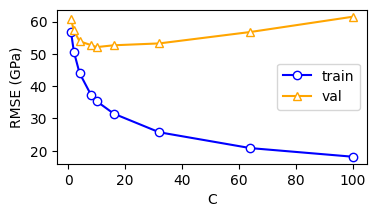

In [12]:
######### SOLUTION

fig = plt.figure(figsize=(4,2))
ax = plt.subplot()

x = sorted([C for C in scores])
train_means = [np.mean(scores[C]['train']) for C in x]
val_means = [np.mean(scores[C]['val']) for C in x]

ax = plt.plot(x, train_means, markerfacecolor='white', color='blue', marker='o', label='train')
ax = plt.plot(x, val_means, markerfacecolor='white', color='orange', marker='^', label='val')
ax = plt.legend(loc='best')
ax = plt.xlabel('C')
ax = plt.ylabel('RMSE (GPa)')

### ***SOLUTION***
- A regularization parameter of ~4-40 seems reasonable because the validation error is lowest with these C values
- I would probably use a value of ~4-10 because these models are less over-fit to the training data (have less variance)


### (c) Use permutation importances to determine which features are most important for this prediction

**Guidelines**:
- use `sklearn.inspection.permutation_importance`
- use `SVR(kernel='poly', C=32)` as your estimator
- permutation importances should be determined on a validation set
    - you should fit your estimator to a subset of `X_train`, `y_train` and determine importances using a different subset
- use `n_repeats = 2` so that it doesn't take too long
- use `scoring = 'neg_root_mean_squared_error'`
- print the 10 most important features
    - print the feature name along with the importance value
- plot a bar chart of all sorted importances
    - the y-axis is the feature importance
    - the x-axis is the index of each feature (index = 0 should correspond with the most important feature)

**Hints**:
- review the [User Guide](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance) for `permutation_importance`

**Scoring**:
- +4 points for attempting
- +3 points for successfully computing permutation importances
- +1 point for correctly using a validation set
- +1 point for printing the 10 most important features and their corresponding importance values
- +1 point for generating the bar chart

In [13]:
########## SOLUTION

from sklearn.inspection import permutation_importance

In [14]:
########## SOLUTION

model = SVR(kernel='poly', C=32)
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.2)
model.fit(X_train_train, y_train_train)

SVR(C=32, kernel='poly')

In [15]:
########## SOLUTION

r = permutation_importance(estimator=model, X=X_train_val, y=y_train_val, n_repeats=2, random_state=44, scoring='neg_root_mean_squared_error')

Feature No. 0 = boiling_point_feat_1 w/ importance = 82.9
Feature No. 1 = heat_of_vaporization_feat_1 w/ importance = 25.9
Feature No. 2 = heat_of_atomization_feat_1 w/ importance = 25.9
Feature No. 3 = first_ionization_energy_feat_1 w/ importance = 21.8
Feature No. 4 = boiling_point_feat_2 w/ importance = 21.3
Feature No. 5 = first_ionization_energy_feat_2 w/ importance = 17.2
Feature No. 6 = melting_point_feat_1 w/ importance = 6.7
Feature No. 7 = boiling_point_feat_4 w/ importance = 3.9
Feature No. 8 = boiling_point_feat_3 w/ importance = 3.8
Feature No. 9 = heat_of_vaporization_feat_2 w/ importance = 3.4


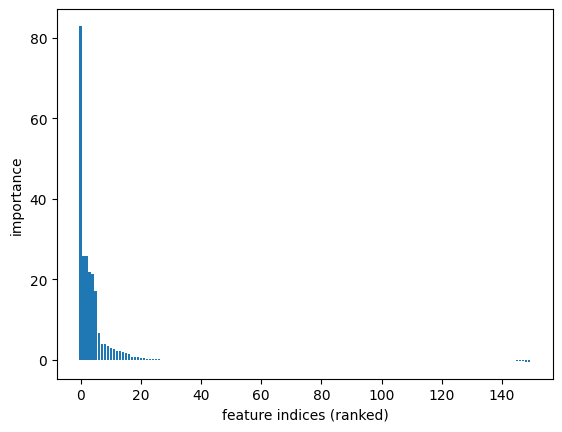

In [16]:
########## SOLUTION

feature_names = []
mean_importances = []
for i in r.importances_mean.argsort()[::-1]:
    feature_names.append(features[i])
    mean_importances.append(r.importances_mean[i])
    
for i in range(10):
    print('Feature No. %i = %s w/ importance = %.1f' % (i, feature_names[i], mean_importances[i]))

fig = plt.figure()
ax = plt.bar(range(len(feature_names)), mean_importances)
ax = plt.ylabel('importance')
ax = plt.xlabel('feature indices (ranked)')

### (d) Consider how feature correlations might influence your results
**Guidelines**:
- compute the pairwise Pearson correlation among three features in your model: `['crystal_radius_feat_1', 'covalent_radius_feat_1', 'ionic_radius_feat_1']`
- for the purposes of this exercise, it's OK to use your full data (ie the whole DataFrame). In practice, you'd want to do this only on the training set
- your printed output should be:
  - PC(feature 1, feature 2) = <the Pearson correlation between feature 1 and feature 2> 
  - PC(feature 1, feature 3) = <the Pearson correlation between feature 1 and feature 3>
  - PC(feature 2, feature 3) = <the Pearson correlation between feature 2 and feature 3>
- discuss the implications of these correlations on: 1) training the model and 2) interpreting the feature importances

**Hints**:
- [this link](https://realpython.com/numpy-scipy-pandas-correlation-python/) may help

**Scoring**:
- +4 points for attempting
- +4 points for correctly computing and printing Pearson correlations
- +2 points for discussing implications for training
- +2 points for appropriately discussing implications for interpretation

In [17]:
######## SOLUTION

from scipy.stats import pearsonr

radii_features = ['crystal_radius_feat_1', 'covalent_radius_feat_1', 'ionic_radius_feat_1']

corr = df[radii_features].corr(method='pearson')

feature1, feature2 = radii_features[0], radii_features[1]
print('PC(%s, %s) = %.2f' % (feature1, feature2, pearsonr(df[feature1].values, df[feature2].values).statistic))
feature1, feature2 = radii_features[0], radii_features[2]
print('PC(%s, %s) = %.2f' % (feature1, feature2, pearsonr(df[feature1].values, df[feature2].values).statistic))
feature1, feature2 = radii_features[1], radii_features[2]
print('PC(%s, %s) = %.2f' % (feature1, feature2, pearsonr(df[feature1].values, df[feature2].values).statistic))

PC(crystal_radius_feat_1, covalent_radius_feat_1) = 0.88
PC(crystal_radius_feat_1, ionic_radius_feat_1) = 0.86
PC(covalent_radius_feat_1, ionic_radius_feat_1) = 1.00


### SOLUTION
1. These features are highly correlated with one another, which adds unnecessary noise to the model training process. Put another way, nearly all the same information could be supplied with just one of these features, so we are unnecessarily increasing the dimensionality of our model, thereby encouraging overfitting.
2. This correlation is especially problematic for interpreting the feature importances. We are trying to understand which features are important to the model. However, because two features carry the same information, the model training process could artificially and randomly distribute "importance" between them. This leads to different conclusions than if we were to train a model using just one of these features